![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Analyze the data 

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Import required Library

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import datetime
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.ticker as ticker
import squarify


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### read data from 3 csv files: clean_df, Comment_frame, Reactions_Frame

In [313]:
# read clean_df 
clean_df = pd.read_csv('Data/clean_df.csv')
# read Comment_frame
Comment_frame = pd.read_csv('Data/Comment_frame.csv')
# read Reactions_frame
Reactions_frame = pd.read_csv('Data/Reactions_Frame.csv')

#### Information of 3 dataframes

In [314]:
# convert data type of "time" column to datetime
clean_df['time'] = pd.to_datetime(clean_df['time'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   post_id   237 non-null    int64         
 1   text      237 non-null    object        
 2   time      237 non-null    datetime64[ns]
 3   comments  237 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ KB


In [315]:
Comment_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comment_id      3627 non-null   int64 
 1   commenter_id    3627 non-null   int64 
 2   commenter_name  3627 non-null   object
 3   comment_text    3549 non-null   object
 4   post_id         3627 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 141.8+ KB


In [316]:
Reactions_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   like     237 non-null    int64
 1   love     237 non-null    int64
 2   haha     237 non-null    int64
 3   wow      237 non-null    int64
 4   care     237 non-null    int64
 5   sad      237 non-null    int64
 6   angry    237 non-null    int64
 7   post_id  237 non-null    int64
 8   total    237 non-null    int64
dtypes: int64(9)
memory usage: 16.8 KB


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Time period of posts

In [317]:
print(f"This dataset contains data from {clean_df['time'].min()} to {clean_df['time'].max()}, with total {clean_df.shape[0]} posts.")

This dataset contains data from 2023-04-03 15:55:49 to 2023-11-29 23:58:05, with total 237 posts.


In [318]:
# show the number of posts per month
clean_df['month'] = clean_df['time'].dt.month
print(f"The number of posts per month:\n{clean_df['month'].value_counts()}, all are in 2023.")

The number of posts per month:
11    174
4      42
10     21
Name: month, dtype: int64, all are in 2023.


In [319]:
#delete the month column
clean_df.drop(columns=['month'], inplace=True)

#### Distribution of the number of articles


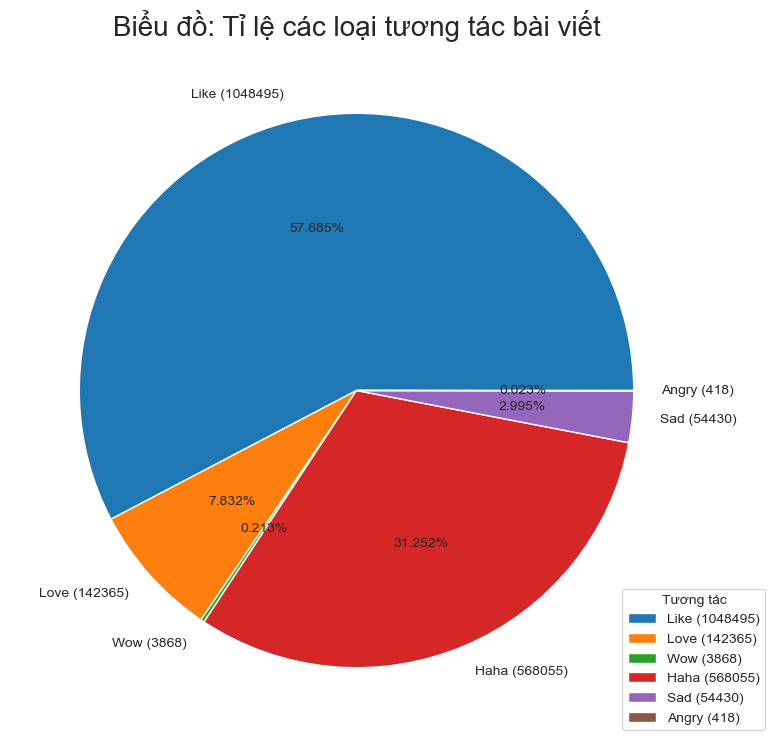

In [320]:
# Draw pie plot to show the percentage of each reaction type
Like = Reactions_frame['like'].sum()
Love = Reactions_frame['love'].sum()
Wow = Reactions_frame['wow'].sum()
Haha = Reactions_frame['haha'].sum()
Sad = Reactions_frame['sad'].sum()
Angry = Reactions_frame['angry'].sum()

# draw pie plot
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
labels_with_counts = ['Like ({})'.format(Like), 'Love ({})'.format(Love), 'Wow ({})'.format(Wow), 'Haha ({})'.format(Haha), 'Sad ({})'.format(Sad), 'Angry ({})'.format(Angry)]
ax.pie([Like, Love, Wow, Haha, Sad, Angry], labels=labels_with_counts, autopct='%1.3f%%')
ax.set_title('Biểu đồ: Tỉ lệ các loại tương tác bài viết', fontsize=20)
ax.legend(loc='lower right', bbox_to_anchor=(1.1, 0), title = 'Tương tác')
plt.show()

fig.savefig('Plot/Total_Reactions_pie.png', bbox_inches='tight')

#### Draw bar plot for reactions 

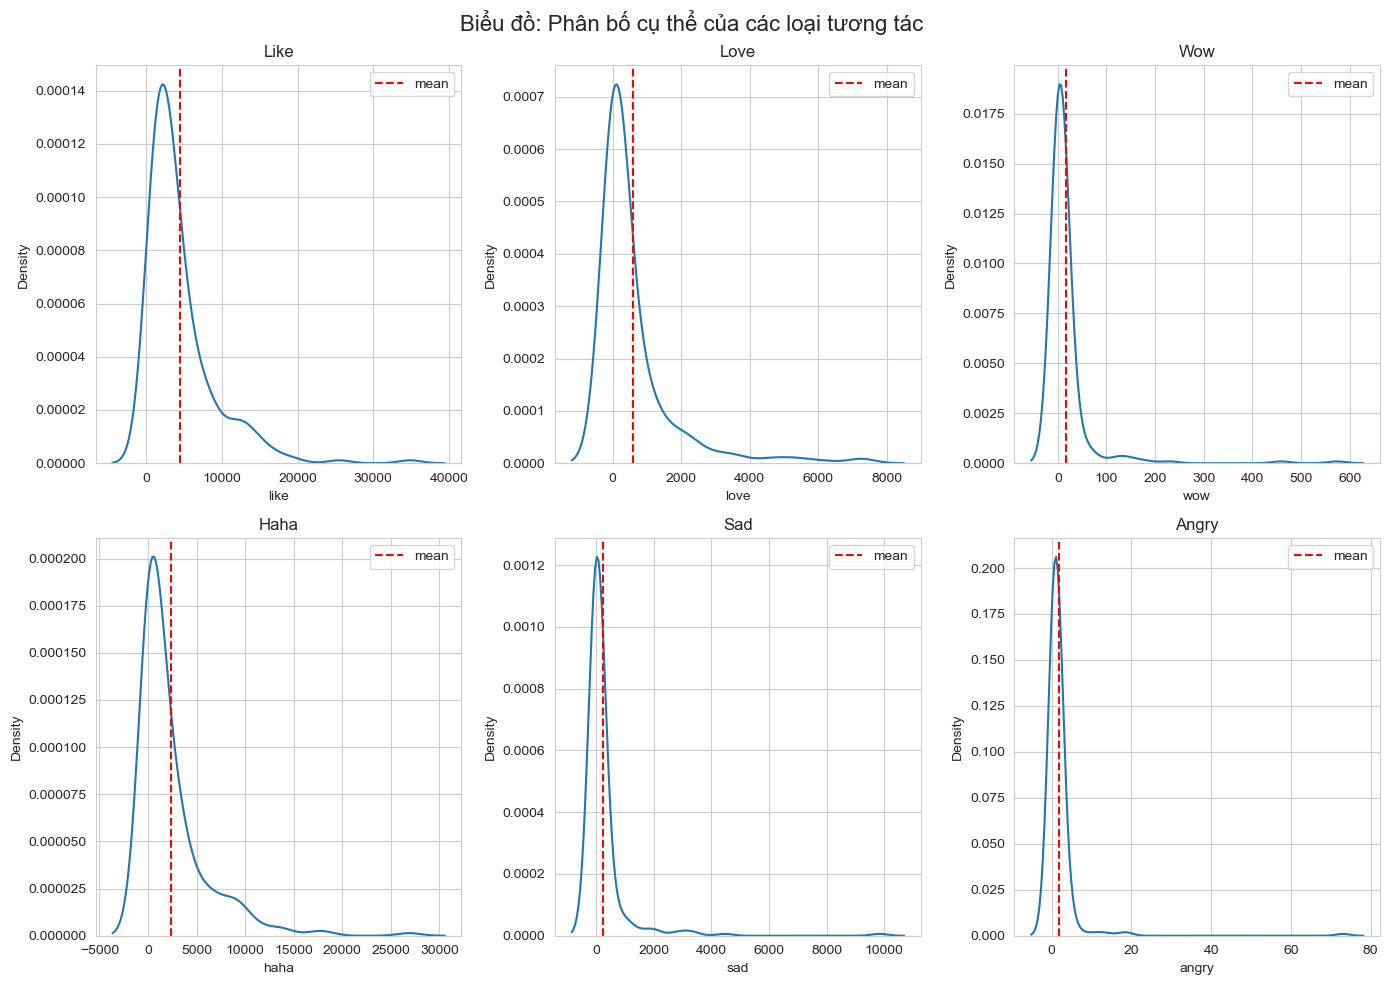

In [321]:
def draw_kdeplots(df):
    fig, axes = plt.subplots(2, 3, figsize=(14, 10))
    fig.suptitle('Biểu đồ: Phân bố cụ thể của các loại tương tác ', fontsize=16)
    reaction_types = ['like', 'love', 'wow', 'haha', 'sad', 'angry']
    for i, reaction_type in enumerate(reaction_types):
        row = i // 3
        col = i % 3
        sns.kdeplot(df[reaction_type], ax=axes[row, col])
        axes[row, col].set_title(reaction_type.capitalize())
        # add mean lines
        mean = df[reaction_type].mean()
        axes[row, col].axvline(mean, color='red', label='mean', linestyle='--')
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()
    fig.savefig('Plot/Reactions_kdeplots.png', bbox_inches='tight')

draw_kdeplots(Reactions_frame)

#### Get the mean of numbers of comments and reactions

In [322]:
# mean of each reaction type and comments 
comments_mean = clean_df['comments'].mean()
like_mean = Reactions_frame['like'].mean()
love_mean = Reactions_frame['love'].mean()
wow_mean = Reactions_frame['wow'].mean()
haha_mean = Reactions_frame['haha'].mean()
sad_mean = Reactions_frame['sad'].mean()
angry_mean = Reactions_frame['angry'].mean()

#### Post has the largest amount of reactions

- Post has the largest number of comments 

In [323]:
# Find the post that have the most comment in clean_df
max_comment_post = clean_df['comments'].max()
max_comment_post_id = clean_df[clean_df['comments'] == max_comment_post]['post_id']
clean_df.loc[clean_df['comments'] == max_comment_post]

,post_id,text,time,comments
118,723083116519068,Những chiếc áo lông vũ xinh xắn cho mùa đông n...,2023-11-15 11:22:15,3359


- Users have the most comments

In [324]:
# Users who have the most comments on all posts
max_comment_user = Comment_frame['commenter_name'].groupby(Comment_frame['commenter_name']).count().sort_values(ascending=False)
max_comment_user.head()


commenter_name
Phương Thảo                18
Weibo Việt Nam             16
Nguyễn Kim Bài Vũ          13
Góc nhỏ của Tiểu Nguyệt    12
Giang Thảo Huyền           10
Name: commenter_name, dtype: int64

##### Post Analyst


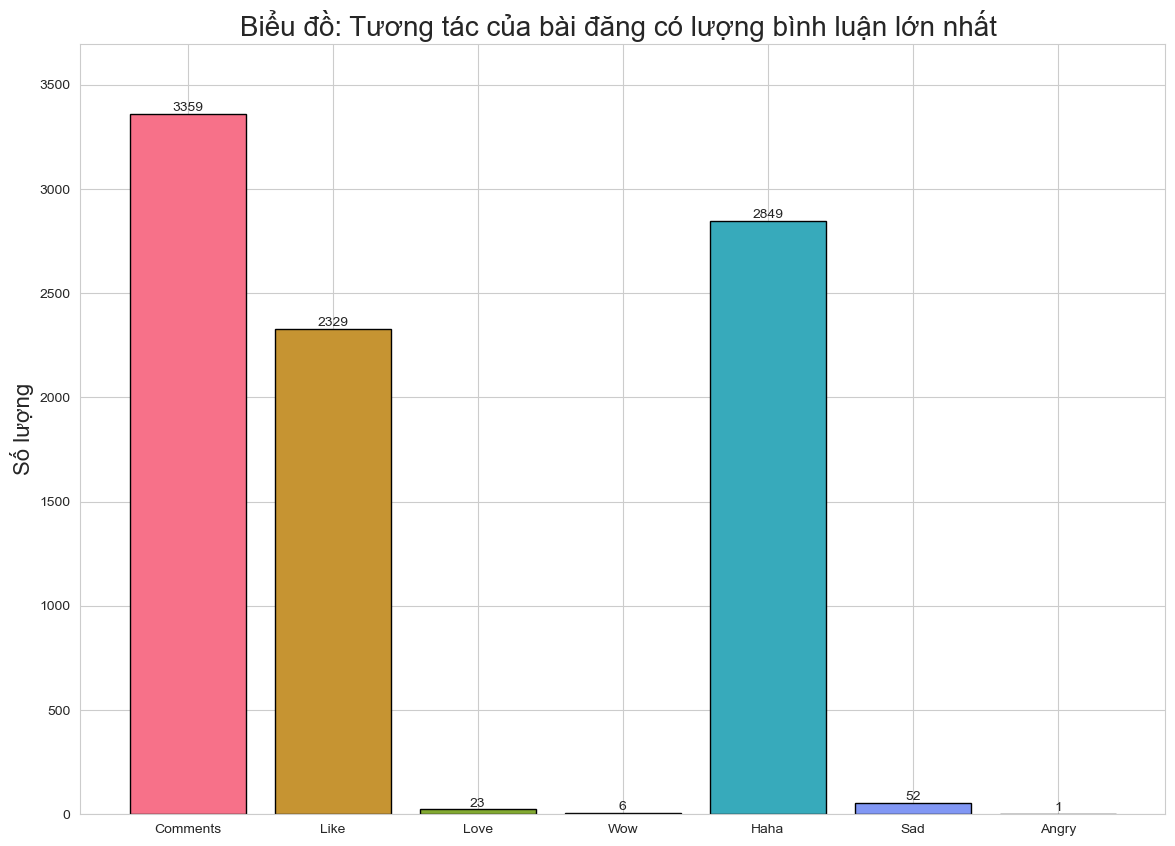

In [325]:
# draw bar plot to show the number of comments, reactions of the post that have the most comments
Comments = clean_df[clean_df['post_id'] == max_comment_post_id.values[0]]['comments'].values[0]
Like = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['like'].values[0]
Love = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['love'].values[0]
Wow = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['wow'].values[0]
Haha = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['haha'].values[0]
Sad = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['sad'].values[0]
Angry = Reactions_frame[Reactions_frame['post_id'] == max_comment_post_id.values[0]]['angry'].values[0]

# draw bar plot
fig, ax = plt.subplots(figsize=(14,10))
labels = ['Comments', 'Like', 'Love', 'Wow', 'Haha', 'Sad', 'Angry']
counts = [Comments, Like, Love, Wow, Haha, Sad, Angry]
colors = sns.color_palette('husl', 7)  
bars = ax.bar(labels, counts, color=colors, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

ax.set_title('Biểu đồ: Tương tác của bài đăng có lượng bình luận lớn nhất ', fontsize=20)
ax.set_ylabel('Số lượng', fontsize=16)
ax.grid(True)
ax.set_ylim([0, max(counts)*1.1])

plt.show()

fig.savefig('Plot/Max_Comment_post_bar.png', bbox_inches='tight')



- Post with the largest total reactions

In [326]:
# Find the post that have the most reactions in clean_df by total in Reactions_frame
max_reactions_post = Reactions_frame['total'].max()
max_reactions_post_id = Reactions_frame.loc[Reactions_frame['total'] == max_reactions_post]['post_id'].values[0]
clean_df.loc[clean_df['post_id'] == max_reactions_post_id]

,post_id,text,time,comments
175,715226890638024,"Hôm nay tan ca, tôi về nhà khá sớm chứ không ở...",2023-10-31 21:25:11,2636


#### Post Analyst

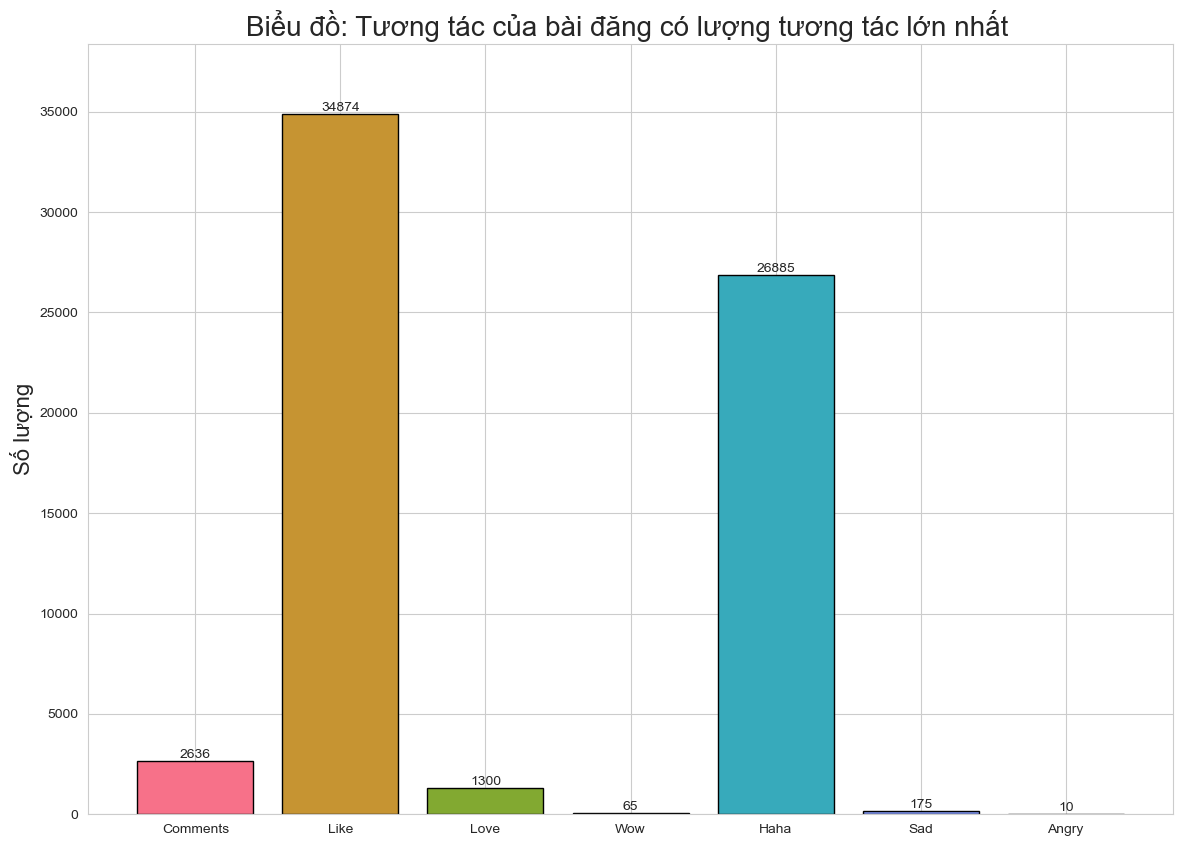

In [327]:
# draw bar plot to show the number of comments, reactions of the post that have the most reactions
Comments_1 = clean_df[clean_df['post_id'] == max_reactions_post_id]['comments'].values[0]
Like_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['like'].values[0]
Love_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['love'].values[0]
Wow_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['wow'].values[0]
Haha_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['haha'].values[0]
Sad_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['sad'].values[0]
Angry_1 = Reactions_frame[Reactions_frame['post_id'] == max_reactions_post_id]['angry'].values[0]

# draw bar plot
fig, ax = plt.subplots(figsize=(14,10))
labels = ['Comments', 'Like', 'Love', 'Wow', 'Haha', 'Sad', 'Angry']
counts = [Comments_1, Like_1, Love_1, Wow_1, Haha_1, Sad_1, Angry_1]
colors = sns.color_palette('husl', 7) 
bars = ax.bar(labels, counts, color=colors, edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

ax.set_title('Biểu đồ: Tương tác của bài đăng có lượng tương tác lớn nhất ', fontsize=20)
ax.set_ylabel('Số lượng', fontsize=16)
ax.grid(True)
ax.set_ylim([0, max(counts)*1.1]) 

plt.show()

fig.savefig('Plot/Max_Reactions_post_bar.png', bbox_inches='tight')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Analyze page interactions by hour in a day 


#### Create hour field for posts in clean_df 

In [328]:
# create hour, weekday column in clean_df(temporary for drawing plot)
clean_df['weekday'] = clean_df['time'].dt.weekday
# name weekday
clean_df['weekday'] = clean_df['weekday'].replace(0, 'Monday')
clean_df['weekday'] = clean_df['weekday'].replace(1, 'Tuesday')
clean_df['weekday'] = clean_df['weekday'].replace(2, 'Wednesday')
clean_df['weekday'] = clean_df['weekday'].replace(3, 'Thursday')
clean_df['weekday'] = clean_df['weekday'].replace(4, 'Friday')
clean_df['weekday'] = clean_df['weekday'].replace(5, 'Saturday')
clean_df['weekday'] = clean_df['weekday'].replace(6, 'Sunday')

#hour
clean_df['hour'] = clean_df['time'].dt.hour

clean_df.head()

,post_id,text,time,comments,weekday,hour
0,731043432389703,NHẬT KÝ ĐI LẤY CHỒNG XA: KHÔNG DẬY SỚM BỊ CHỒN...,2023-11-29 23:58:05,603,Wednesday,23
1,731015475725832,Bạn cùng phòng chỉ cho tôi cách dùng khăn giấy...,2023-11-29 22:54:15,37,Wednesday,22
2,730966445730735,Đôi mắt chăm chú và biểu cảm tràn đầy yêu thíc...,2023-11-29 21:11:50,58,Wednesday,21
3,730945852399461,Sau này đám cưới của tui và anh iu sẽ kiểu C...,2023-11-29 20:31:34,32,Wednesday,20
4,730934009067312,HÌNH TƯỢNG KHI ĐI LÀM VÀ SAU KHI TAN LÀM CỦA G...,2023-11-29 20:07:05,71,Wednesday,20


#### Draw line chart shows the page's active time in a day

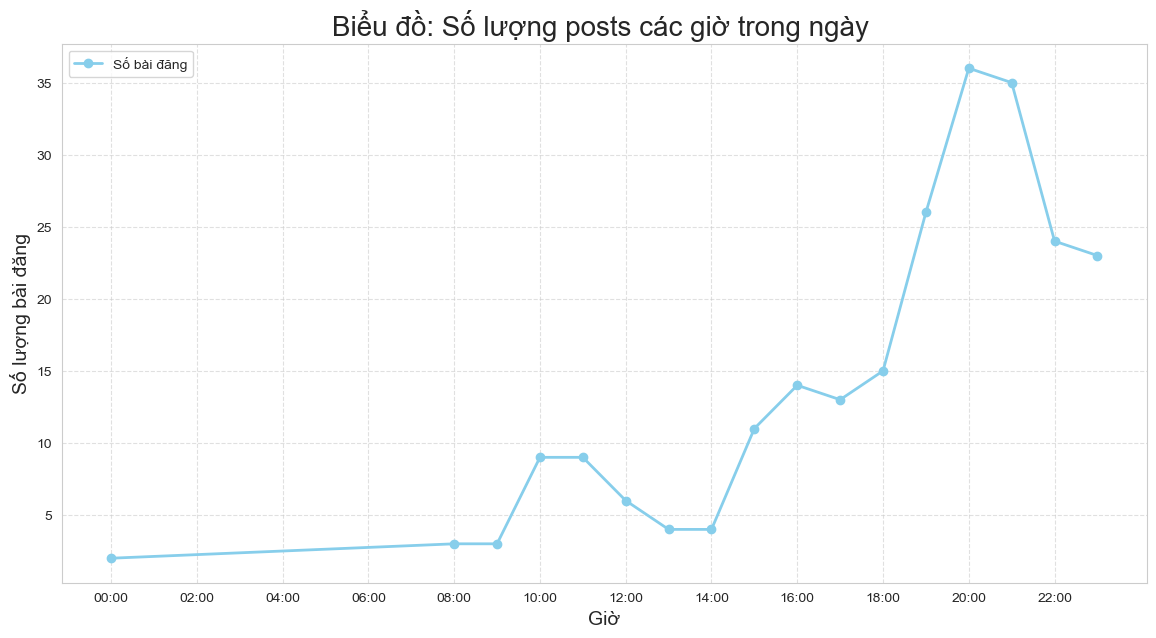

In [331]:
# Draw line plot to show the number of posts per hour
# value_count
hour_counts = clean_df['hour'].value_counts().sort_index()

# Draw the line plot
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(hour_counts.index, hour_counts.values, color='skyblue', linewidth=2, marker='o')
ax.set_title('Biểu đồ: Số lượng posts các giờ trong ngày ', fontsize=20)
ax.set_xlabel('Giờ', fontsize=14)
ax.set_ylabel('Số lượng bài đăng', fontsize=14)
ax.set_xticks(range(0, 24, 2))
# Format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:02d}:00'.format(int(x))))
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(['Số bài đăng'], loc='upper left')

plt.show()

fig.savefig('Plot/Posts_per_hour_line.png', bbox_inches='tight')

#### 

#### Draw tree map shows the page's active time in a week

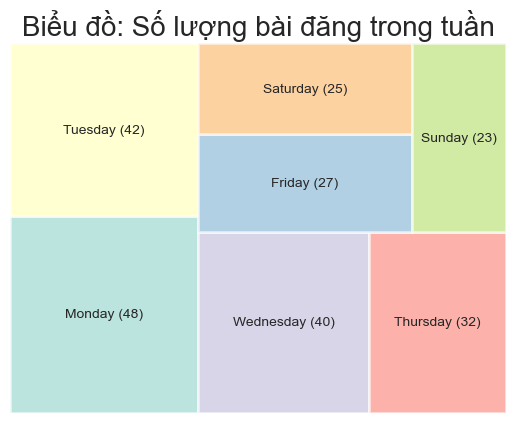

In [332]:
# draw tree map to show the number of posts per weekday
weekday_counts = clean_df['weekday'].value_counts()

# Normalize
normed = weekday_counts / weekday_counts.sum()
# Create a DataFrame
df = pd.DataFrame({'count': weekday_counts, 'normed_count': normed})

# draw tree map
labels = [f'{index} ({count})' for index, count in zip(df.index, df['count'])]
squarify.plot(sizes=df['normed_count'], label=labels, alpha=0.6, edgecolor='white', linewidth=2, color=sns.color_palette('Set3', len(df)))
plt.title('Biểu đồ: Số lượng bài đăng trong tuần', fontsize=20)
plt.axis('off')
plt.show()

fig.savefig('Plot/Posts_per_weekday_treemap.png', bbox_inches='tight')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Text Analyst

#### Create text_len for text in clean df and comment_text

In [333]:
# create text_len column in Comment_frame, clean_df
Comment_frame['text_len'] = Comment_frame['comment_text'].str.len()
clean_df['text_len'] = clean_df['text'].str.len()

#### Text Distribution 

#### Draw bar plot shows the distribution of text length

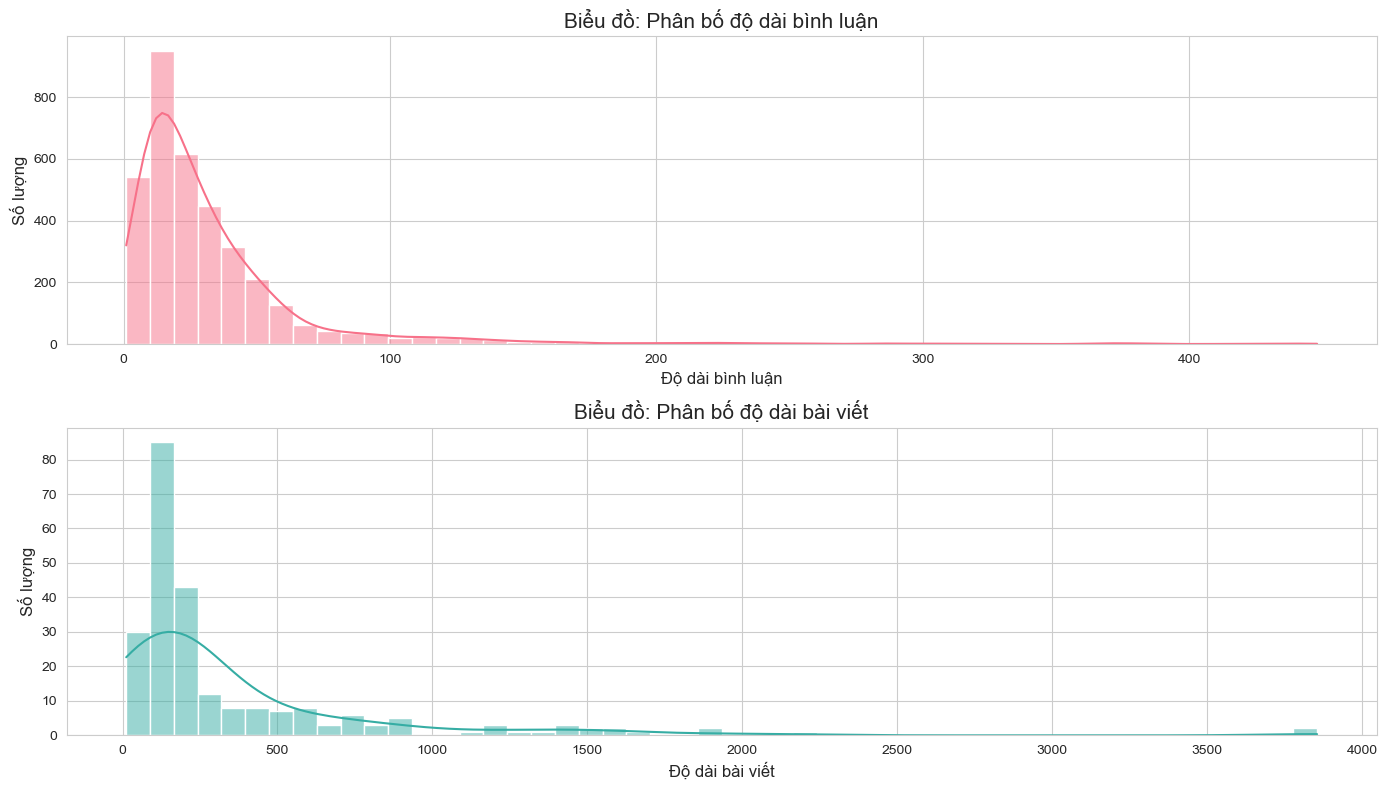

In [334]:
sns.set_style('whitegrid')
palette = sns.color_palette('husl', 2)
fig, axs = plt.subplots(2, figsize=(14, 8))

# Plot for Comment_frame
sns.histplot(Comment_frame['text_len'], ax=axs[0], bins=50, color=palette[0], kde=True)
axs[0].set_title('Biểu đồ: Phân bố độ dài bình luận', fontsize=15)
axs[0].set_xlabel('Độ dài bình luận', fontsize=12)
axs[0].set_ylabel('Số lượng', fontsize=12)

# Plot for clean_df
sns.histplot(clean_df['text_len'], ax=axs[1], bins=50, color=palette[1], kde=True)
axs[1].set_title('Biểu đồ: Phân bố độ dài bài viết', fontsize=15)
axs[1].set_xlabel('Độ dài bài viết', fontsize=12)
axs[1].set_ylabel('Số lượng', fontsize=12)

plt.tight_layout()
plt.show()

fig.savefig('Plot/Text_len_hist.png', bbox_inches='tight')

#### Draw wordcloud for page's content and comments

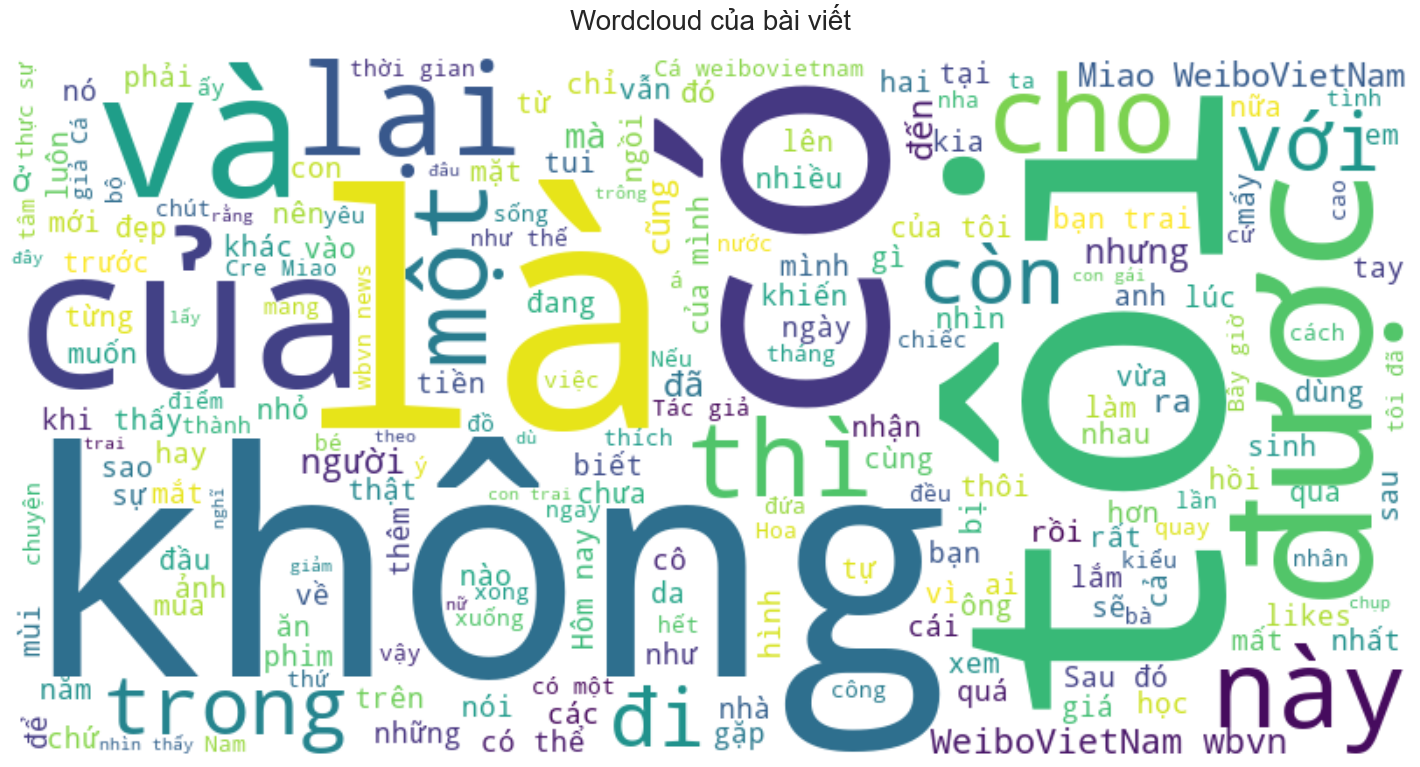

In [335]:
# draw word cloud for clean_df
text = ' '.join(clean_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)

# Display the word cloud
fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud của bài viết', fontsize=20, pad=20)
plt.box(on=None)
plt.tight_layout(pad=0)

plt.show()

fig.savefig('Plot/Wordcloud.png', bbox_inches='tight')


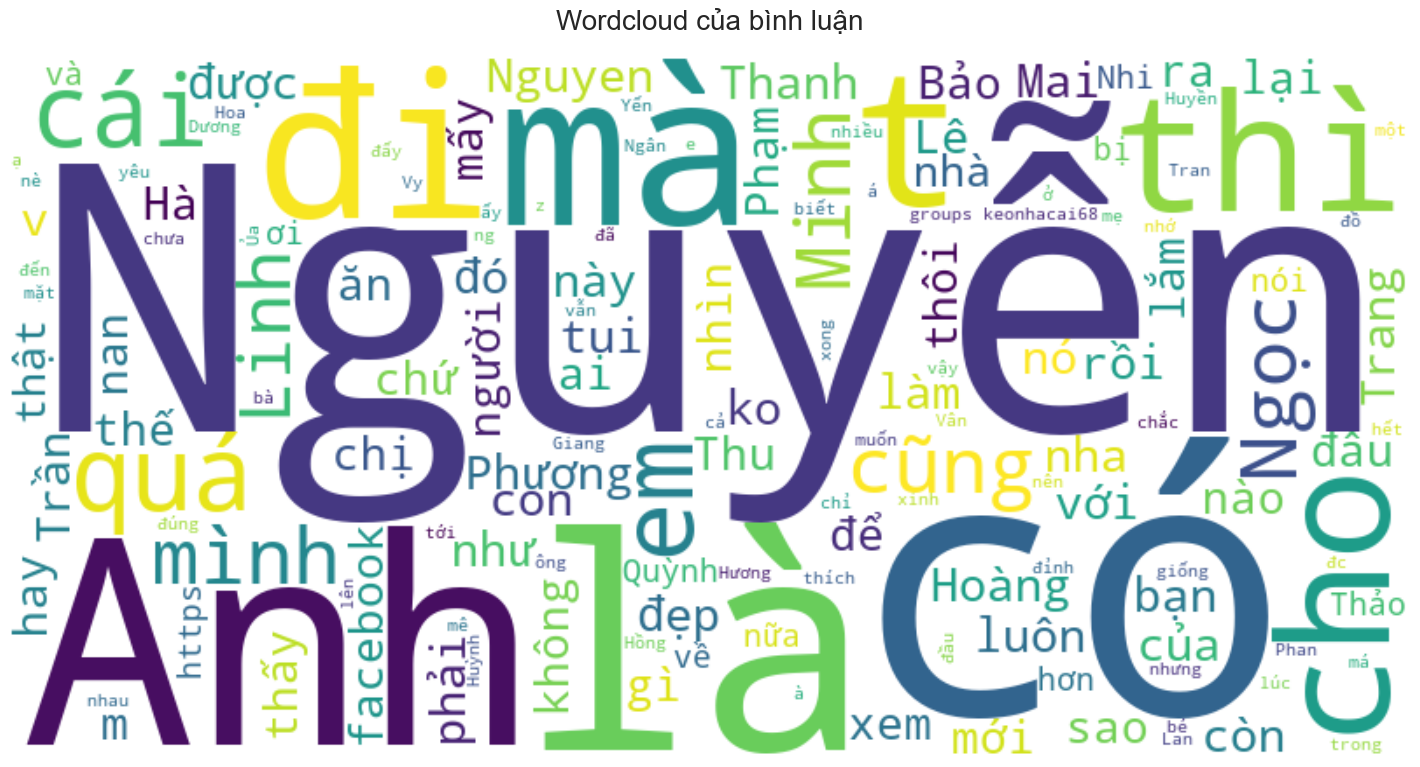

In [336]:
# draw wordcloud for Comment_frame
text = ' '.join(Comment_frame['comment_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=150).generate(text)

# Display the wordcloud
fig, ax = plt.subplots(figsize=(14, 10), facecolor='white')
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Wordcloud của bình luận', fontsize=20, pad=20)
plt.box(on=None)
plt.tight_layout(pad=0)

plt.show()

fig.savefig('Plot/Wordcloud_comment.png', bbox_inches='tight')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Relationship between related data fields

#### Questions1: The more reactions, the more likes the post will have 

In [337]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   post_id   237 non-null    int64         
 1   text      237 non-null    object        
 2   time      237 non-null    datetime64[ns]
 3   comments  237 non-null    int64         
 4   weekday   237 non-null    object        
 5   hour      237 non-null    int64         
 6   text_len  237 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 13.1+ KB


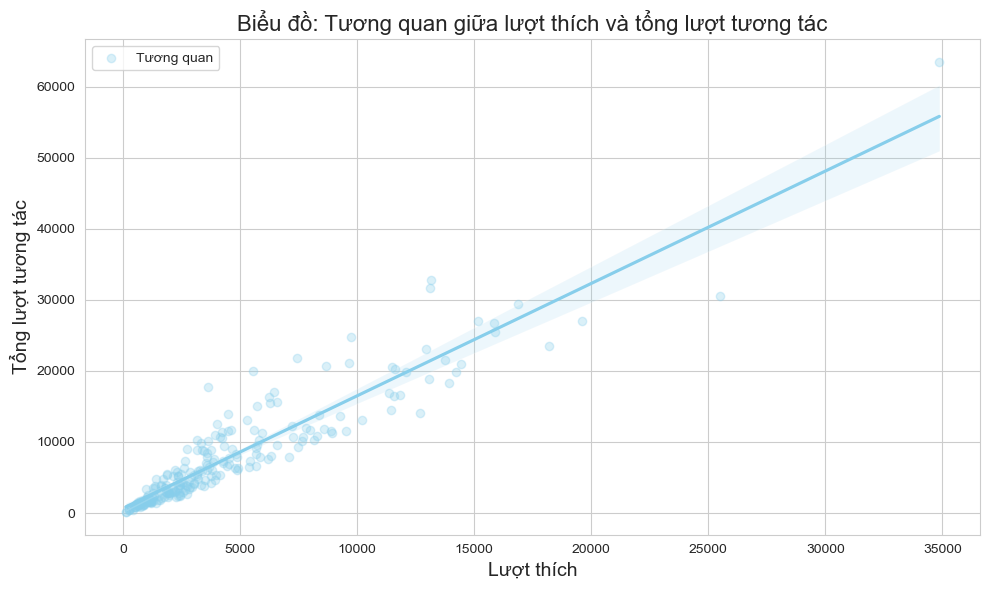

In [344]:
# draw a regression plot to show the relationship between the number of likes and total reactions
import seaborn as sns
import matplotlib.pyplot as plt

# Draw the regression plot
sns.set_style("whitegrid")  # Set the seaborn style to whitegrid
plt.figure(figsize=(10, 6))  # Increase the size of the figure
sns.regplot(x='like', y='total', data=Reactions_frame, color='skyblue', scatter_kws={'alpha': 0.3})

# Add labels and title
plt.xlabel('Lượt thích', fontsize=14)
plt.ylabel('Tổng lượt tương tác', fontsize=14)
plt.title('Biểu đồ: Tương quan giữa lượt thích và tổng lượt tương tác', fontsize=16)
plt.tight_layout()
plt.legend(['Tương quan'], loc='upper left')

plt.show()

fig.savefig('Plot/Reactions_like_regplot.png', bbox_inches='tight')

#### Questions2: The more comments, the more reactions the post will have?

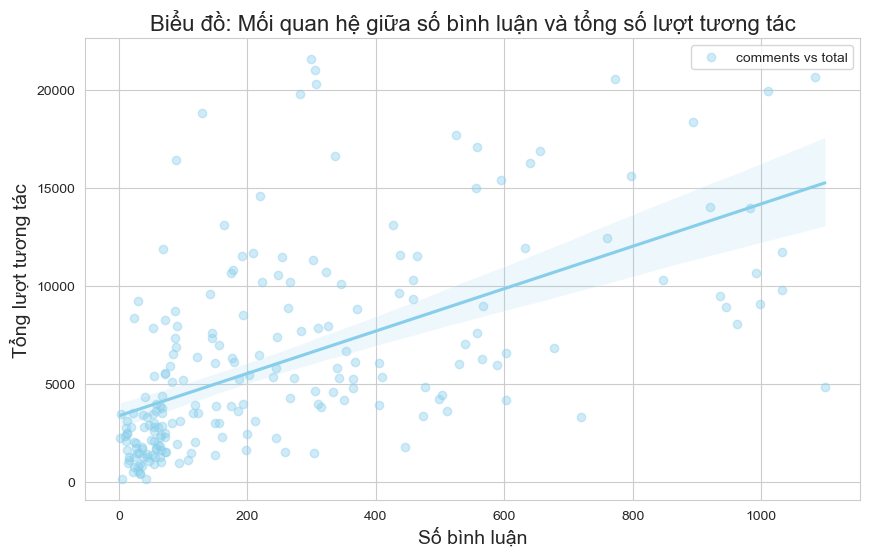

In [346]:
# draw a regression plot to show the relationship between the number of comments and total reactions
# Merge the dataframes on 'post_id'
merged_df = pd.merge(clean_df, Reactions_frame, on='post_id')

Q1_comments = merged_df['comments'].quantile(0.25)
Q3_comments = merged_df['comments'].quantile(0.75)
IQR_comments = Q3_comments - Q1_comments

# Calculate the IQR for 'total'
Q1_total = merged_df['total'].quantile(0.25)
Q3_total = merged_df['total'].quantile(0.75)
IQR_total = Q3_total - Q1_total

# Set the upper and lower limits for 'comments'
lower_limit_comments = Q1_comments - 1.5 * IQR_comments
upper_limit_comments = Q3_comments + 1.5 * IQR_comments

# Set the upper and lower limits for 'total'
lower_limit_total = Q1_total - 1.5 * IQR_total
upper_limit_total = Q3_total + 1.5 * IQR_total

# Filter the DataFrame
filtered_df = merged_df[(merged_df['comments'] >= lower_limit_comments) & 
                        (merged_df['comments'] <= upper_limit_comments) & 
                        (merged_df['total'] >= lower_limit_total) & 
                        (merged_df['total'] <= upper_limit_total)]

# Draw plot
sns.set_style("whitegrid") 
plt.figure(figsize=(10, 6))
sns.regplot(x='comments', y='total', data=filtered_df, color='skyblue', scatter_kws={'alpha': 0.4}, label='comments vs total')
plt.xlabel('Số bình luận', fontsize=14)
plt.ylabel('Tổng lượt tương tác', fontsize=14)
plt.title('Biểu đồ: Mối quan hệ giữa số bình luận và tổng số lượt tương tác', fontsize=16)
plt.legend()

plt.show()

fig.savefig('Plot/Reactions_comments_regplot.png', bbox_inches='tight')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

#### Relation between fields: Total reactions, Like, Haha, Length of Post text, Comments

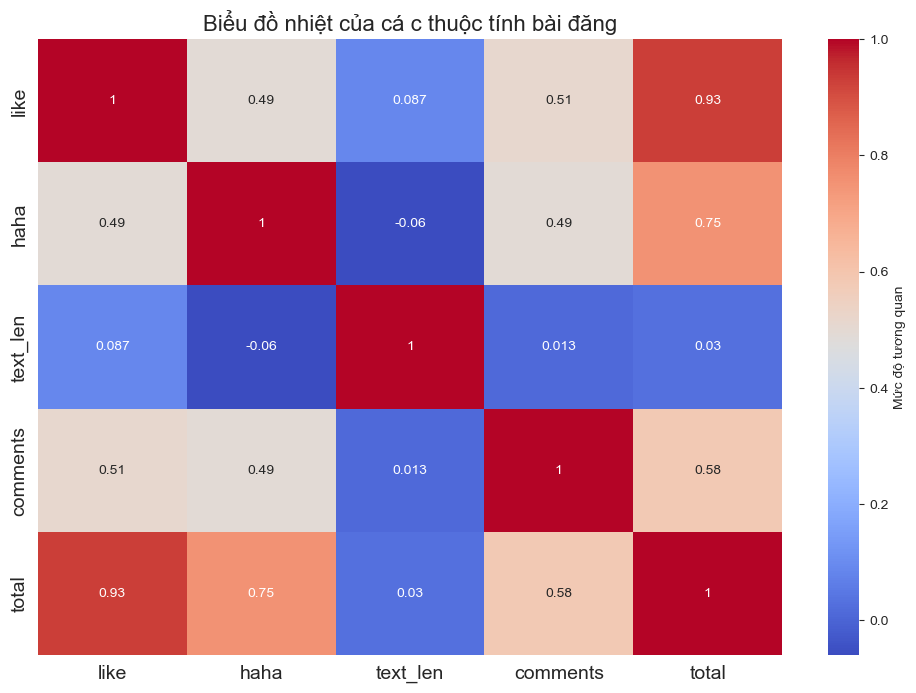

In [349]:
# Merge dataframe
merged_df_1 = pd.merge(clean_df, Reactions_frame, on='post_id')
selected_fields = merged_df_1[['like', 'haha', 'text_len', 'comments', 'total']]
corr = selected_fields.corr()

# Draw the heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar_kws={'label': 'Mức độ tương quan'})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Biểu đồ nhiệt của cá c thuộc tính bài đăng', fontsize=16)

plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## The End!